<a href="https://colab.research.google.com/github/olesyaRU/OlesyaRepository/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_5_(%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D1%82%D0%B5%D1%81%D1%82%D1%8B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Параметрические тесты

## 1. t-критерий Стьюдента

## 1.1 Одновыборочный t-тест

**Задача**. Исследователь измерил уровень концентрации глюкозы в крови у группы испытуемых и получил следующие значения: 95, 100, 105, 110, 115, 120, 125 мг/дл. Известно, что средний уровень концентрации глюкозы в популяции здоровых взрослых составляет 100 мг/дл. Требуется определить, значимо ли отличается средний уровень концентрации глюкозы в данной группе испытуемых от нормы.

Для решения этой задачи можно применить одновыборочный t-тест для проверки гипотезы о равенстве средних значений уровня глюкозы в группе испытуемых и в популяции здоровых взрослых.

In [ ]:
import scipy.stats as stats
import seaborn as sns
from scipy.stats import norm #загружаем график нормального распределения
import numpy as np

In [ ]:
# Уровень концентрации глюкозы в крови у испытуемых
glucose_levels = np.array([95, 100, 105, 110, 115, 120, 125])

<ipython-input-9-fb7d65246f17>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(glucose_levels , fit=norm)


<Axes: ylabel='Density'>

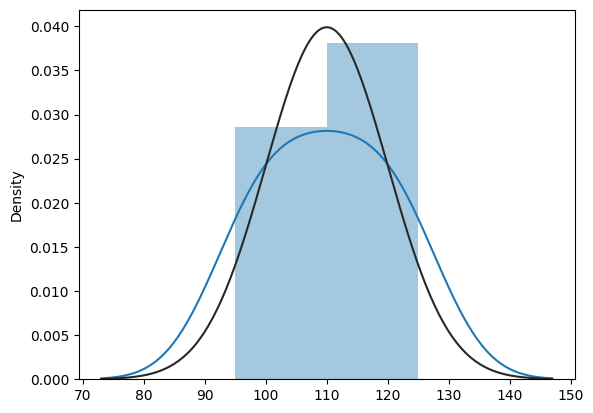

In [ ]:
# посмотрим как выглядит распределение переменной концентрации глюкозы в крови в сравнении с графиком нормального распределения
sns.distplot(glucose_levels , fit=norm)

Вывод: распределение примерно нормальное

In [ ]:
from scipy.stats import shapiro
# Проведение теста Шапиро-Уилка для проверки на нормальность данных
statistic, p_value = shapiro(glucose_levels)

# Вывод результатов
print("Значение статистики теста Шапиро-Уилка:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Данные распределены нормально")
else:
    print("Данные НЕ распределены нормально")

Значение статистики теста Шапиро-Уилка: 0.9780016541481018
p-value: 0.9492886662483215
Данные распределены нормально


Используем функцию **ttest_1samp()** из библиотеки **scipy.stats** для выполнения **одновыборочного t-теста**

In [ ]:
import numpy as np
from scipy.stats import ttest_1samp

# Средний уровень концентрации глюкозы в популяции здоровых взрослых
population_mean = 100

# Выполнение одновыборочного t-теста
t_statistic, p_value = ttest_1samp(glucose_levels, population_mean)

print(f"Значение t-статистики: {t_statistic}")
print(f"Значение p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Средний уровень концентрации глюкозы в группе испытуемых значимо отличается от нормы")
else:
    print("Средний уровень концентрации глюкозы в группе испытуемых не значимо отличается от нормы")

Значение t-статистики: 2.449489742783178
Значение p-value: 0.04982526278057675
Средний уровень концентрации глюкозы в группе испытуемых значимо отличается от нормы


## 1.2 Двухвыборочный t-тест

Задача. Проводится исследование эффективности двух различных лекарственных препаратов для снижения кровяного давления у пациентов с гипертонией. У пациентов случайным образом разделяют на две группы: одной группе дают препарат А, а другой - препарат В. После определенного периода лечения измеряют уровень кровяного давления у пациентов из каждой группы.

Данные для 15 пациентов в каждой из двух групп:

Группа А (препарат A):
98, 102, 105, 110, 100, 95, 108, 112, 107, 99, 101, 104, 113, 96, 106

Группа B (препарат B):
100, 98, 103, 108, 107, 99, 110, 105, 112, 96, 101, 115, 94, 106, 113

Эти данные представляют уровень кровяного давления после лечения каждого пациента в каждой из групп.

Задача состоит в том, чтобы проверить, есть ли статистически значимая разница в средних уровнях кровяного давления у пациентов, принимавших препарат А, и у пациентов, принимавших препарат В. Для этого проводится двухвыборочный t-тест, который позволит определить, есть ли значимое различие между эффективностью двух лекарственных препаратов в снижении кровяного давления.

In [ ]:
# Данные для двух групп
group_A = [98, 102, 105, 110, 100, 95, 108, 112, 107, 99, 101, 104, 113, 96, 106]
group_B = [100, 98, 103, 108, 107, 99, 110, 105, 112, 96, 101, 115, 94, 106, 113]

## Проверка на нормальность

<ipython-input-13-6186ba14dcfd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(group_A , fit=norm)


<Axes: ylabel='Density'>

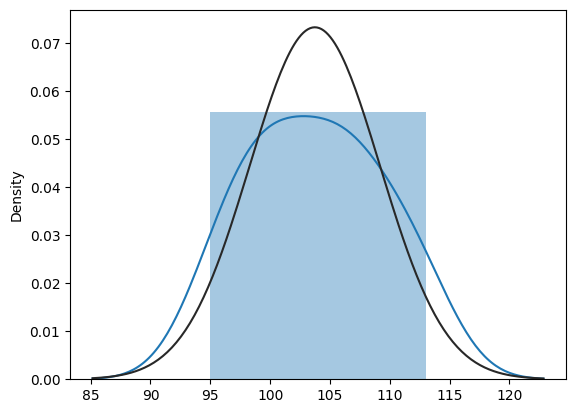

In [ ]:
# посмотрим как выглядит распределение уровня кровяного давления у пациентов,
#принимавших препарат А, сравним с нормальным распределением
sns.distplot(group_A , fit=norm)

**Вывод:** распределение примерно нормальное

<ipython-input-15-31137fce2256>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(group_B , fit=norm)


<Axes: ylabel='Density'>

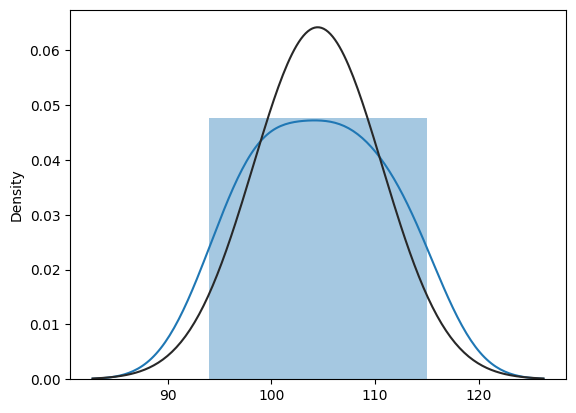

In [ ]:
# посмотрим как выглядит распределение уровня кровяного давления у пациентов,
#принимавших препарат B, сравним с нормальным распределением
sns.distplot(group_B , fit=norm)

**Вывод:** распределение примерно нормальное

## Тест Шапиро-Уилка

In [ ]:
from scipy.stats import shapiro
# Проведение теста Шапиро-Уилка для проверки на нормальность данных
statistic, p_value = shapiro(group_A)

# Вывод результатов
print("Значение статистики теста Шапиро-Уилка:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Данные из группы A распределены нормально")
else:
    print("Данные из группы A НЕ распределены нормально")


Значение статистики теста Шапиро-Уилка: 0.9688448905944824
p-value: 0.840593695640564
Данные из группы A распределены нормально


In [ ]:
from scipy.stats import shapiro
# Проведение теста Шапиро-Уилка для проверки на нормальность данных
statistic, p_value = shapiro(group_B)

# Вывод результатов
print("Значение статистики теста Шапиро-Уилка:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Данные из группы B распределены нормально")
else:
    print("Данные из группы B НЕ распределены нормально")


Значение статистики теста Шапиро-Уилка: 0.9717718362808228
p-value: 0.8833737969398499
Данные из группы B распределены нормально


## Проверка на гомогенность дисперсий

In [ ]:
from scipy.stats import bartlett

# Проведение теста Бартлетта на гомогенность дисперсий
statistic, p_value = bartlett(group_A, group_B)

# Вывод результатов
print("Значение статистики теста Бартлетта:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Дисперсии переменных group_A и group_B считаются гомогенными")
else:
    print("Дисперсии переменных group_A и group_B НЕ считаются гомогенными")


Значение статистики теста Бартлетта: 0.2359870256050624
p-value: 0.627119640135954
Дисперсии переменных group_A и group_B считаются гомогенными


## Двухвыборочный t-тест

Используем функцию **ttest_ind()** из библиотеки **scipy.stats** для выполнения **двухвыборочного t-теста**

In [ ]:
from scipy import stats

# Выполнение двухвыборочного t-теста
t_statistic, p_value = stats.ttest_ind(group_A, group_B)

# Вывод результатов
print("Значение t-статистики:", t_statistic)
print("Значение p-value:", p_value)

if p_value < 0.05:
    print("Различия между группами статистически значимы")
else:
    print("Статистически значимых различий между группами не выявлено")

Значение t-статистики: -0.3319859996577727
Значение p-value: 0.7423722256189611
Статистически значимых различий между группами не выявлено


## 1.3 t-тест для парных выборок

t-критерий Стьюдента для парных выборок используется для сравнения средних значений двух выборок, когда каждое наблюдение в одной выборке может быть сопоставлено с наблюдением в другой выборке.

**Задача**. Исследователь хочет изучить эффективность нового метода лечения гипертонии. У него есть данные о артериальном давлении у одной группы пациентов до начала лечения и спустя месяц после начала лечения. Необходимо выяснить, есть ли статистически значимое различие в артериальном давлении у этих пациентов до и после лечения.

Для решения этой задачи исследователь может воспользоваться t-критерием Стьюдента для парных выборок, который позволит оценить статистическую значимость изменений в артериальном давлении у пациентов до и после лечения. По результатам анализа будет определено, является ли различие в артериальном давлении статистически значимым после применения нового метода лечения гипертонии.

Данные до лечения по 15 пациентам: 140, 150, 130, 145, 160, 135, 148, 155, 125, 140, 152, 142, 128, 148, 130

Данные после лечения: 132, 145, 128, 140, 155, 130, 142, 148, 120, 137, 147, 138, 125, 140, 128

Используем функцию **ttest_rel()** из библиотеки **scipy.stats** для выполнения этого **t-теста парных выборок**:

In [ ]:
# Данные об артериальном давлении до лечения
before_treatment = np.array([140, 150, 130, 145, 160, 135, 148, 155, 125, 140, 152, 142, 128, 148, 130])

# Данные об артериальном давлении после лечения
after_treatment = np.array([132, 145, 128, 140, 155, 130, 142, 148, 120, 137, 147, 138, 125, 140, 128])

## Проверка на нормальность

In [ ]:
from scipy.stats import shapiro
# Проведение теста Шапиро-Уилка для проверки на нормальность данных
statistic, p_value = shapiro(before_treatment)

# Вывод результатов
print("Значение статистики теста Шапиро-Уилка:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Данные об артериальном давлении до лечения распределены нормально")
else:
    print("Данные об артериальном давлении до лечения НЕ распределены нормально")

Значение статистики теста Шапиро-Уилка: 0.9641020894050598
p-value: 0.7632049918174744
Данные об артериальном давлении до лечения распределены нормально


In [ ]:
from scipy.stats import shapiro
# Проведение теста Шапиро-Уилка для проверки на нормальность данных
statistic, p_value = shapiro(after_treatment)

# Вывод результатов
print("Значение статистики теста Шапиро-Уилка:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Данные об артериальном давлении после лечения распределены нормально")
else:
    print("Данные об артериальном давлении после лечения НЕ распределены нормально")

## Проверка на гомогенность дисперсии

In [ ]:
from scipy.stats import bartlett

# Проведение теста Бартлетта на гомогенность дисперсий
statistic, p_value = bartlett(before_treatment, after_treatment)

# Вывод результатов
print("Значение статистики теста Бартлетта:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Дисперсии переменных считаются гомогенными")
else:
    print("Дисперсии переменных НЕ считаются гомогенными")


Значение статистики теста Бартлетта: 0.09810150557240345
p-value: 0.7541199069559243
Дисперсии переменных считаются гомогенными


## t-тест парных выборок

In [ ]:
import numpy as np
from scipy.stats import ttest_rel

# Выполнение t-теста для парных выборок
t_statistic, p_value = ttest_rel(before_treatment, after_treatment)

print(f"Значение t-статистики: {t_statistic}")
print(f"Значение p-value: {p_value}")

if p_value < 0.05:
    print("Различия в артериальном давлении до и после лечения являются статистически значимыми")
else:
    print("Различия в артериальном давлении до и после лечения не являются статистически значимыми")

Значение t-статистики: 10.000402136686422
Значение p-value: 9.336742393578755e-08
Различия в артериальном давлении до и после лечения являются статистически значимыми
